<a href="https://colab.research.google.com/github/rpizarrog/probabilidad-y-estad-stica/blob/master/Python%202023/Caso_03_Tablas_de_frecuencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivo

Crear, visualizar e interpretar tablas de frecuencia de cien datos de personas que contienen la variable edades géneros.

## Desarrollo

### Cargar librerías

In [95]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt



### Crear datos

In [96]:
# Construyendo un data.frame con los datos simulando datos de
# de personas de edad y géne

random.seed(2023) # Semilla para generar los mismos valores aleatorios de los datos

# Crear una lista aleatoria de edades entre 18 y 25 años
# edades = [random.randint(18, 25) for _ in range(100)]

# Crar edades con media aritmética 22 y desiación std de 3
edades = np.random.normal(22, 3, 100)
edades = np.round(edades)
print(edades)

# Crear una lista aleatoria de géneros (Femenino o Masculino)
generos = [random.choice(['Femenino', 'Masculino']) for _ in range(100)]

# print(edades)
# print(generos)

dic = {'Edad': edades, 'Genero': generos} # Se crea un diccionario
datos = pd.DataFrame(dic) # Crea un data.frame a partir del diccionari

datos

[21. 21. 24. 28. 21. 21. 19. 17. 18. 27. 22. 19. 21. 24. 20. 26. 22. 19.
 16. 22. 23. 24. 25. 21. 20. 26. 25. 21. 17. 25. 22. 22. 24. 19. 23. 16.
 21. 26. 17. 23. 20. 22. 19. 26. 23. 26. 23. 24. 23. 24. 22. 20. 20. 19.
 21. 22. 22. 25. 21. 16. 23. 17. 22. 21. 23. 21. 21. 22. 25. 20. 14. 23.
 23. 24. 22. 22. 20. 24. 18. 18. 19. 22. 24. 27. 19. 26. 22. 28. 24. 26.
 24. 17. 26. 18. 26. 28. 20. 22. 22. 19.]


,Edad,Genero
0,21.0,Masculino
1,21.0,Masculino
2,24.0,Masculino
3,28.0,Masculino
4,21.0,Masculino
...,...,...
95,28.0,Masculino
96,20.0,Femenino
97,22.0,Masculino
98,22.0,Femenino


### Análisis decriptivo de los datos



In [97]:
datos.describe()

,Edad
count,100.000000
mean,21.880000
std,2.992516
min,14.000000
25%,20.000000
50%,22.000000
75%,24.000000
max,28.000000


### Crear tablas de frecuencia

#### Tabla de frecuencia de la edad

La tabla de frecuencia de la edad debe agrupar datos a manera de clases de 2 en 2, es decir:
* clases:  de 18-19, de 20-21, de 22-23, de 24-25 años para determinar una tabla la frecuencia de
* clase,
* frecuecia
* frecuencia relativa,
* frecuencia porcentual,
* frecuencia acumulada
* frecuencia relativa acumulada
* frecuncia porcentual acumulada.



### Regla de Sturges:

In [98]:

# Calcular el número de intervalos utilizando la regla de Sturges
n = len(edades)
k = int(1 + np.log2(n))

# Crear un DataFrame con las edades redondeadas
df = pd.DataFrame({'Edad': edades})

# Crear un histograma con pandas y obtener la tabla de frecuencia
tabla_frecuencia = pd.cut(df['Edad'], bins=k, include_lowest=True).value_counts().reset_index()
tabla_frecuencia.columns = ['Clase', 'Frec']

# Ordenar la tabla de frecuencia por el intervalo
tabla_frecuencia = tabla_frecuencia.sort_values(by='Clase')

# Generar columnas siguientes
tabla_frecuencia['Frec Rel'] = tabla_frecuencia['Frec'] / n
tabla_frecuencia['Frec Porc'] = tabla_frecuencia['Frec'] / n * 100
tabla_frecuencia['Frec Ac'] = tabla_frecuencia['Frec'].cumsum()
tabla_frecuencia['Frec Rel Ac'] = tabla_frecuencia['Frec Rel'].cumsum()
tabla_frecuencia['Frec Porc Ac'] = tabla_frecuencia['Frec Porc'].cumsum()


# Mostrar la tabla de frecuencia
print(tabla_frecuencia)


                        Clase  Frec  Frec Rel  Frec Porc  Frec Ac  \
6  (13.985000000000001, 16.0]     4      0.04        4.0        4   
4                (16.0, 18.0]     9      0.09        9.0       13   
2                (18.0, 20.0]    17      0.17       17.0       30   
0                (20.0, 22.0]    30      0.30       30.0       60   
1                (22.0, 24.0]    21      0.21       21.0       81   
3                (24.0, 26.0]    14      0.14       14.0       95   
5                (26.0, 28.0]     5      0.05        5.0      100   

   Frec Rel Ac  Frec Porc Ac  
6         0.04           4.0  
4         0.13          13.0  
2         0.30          30.0  
0         0.60          60.0  
1         0.81          81.0  
3         0.95          95.0  
5         1.00         100.0  


### Histograma de acuerdo con Sturges

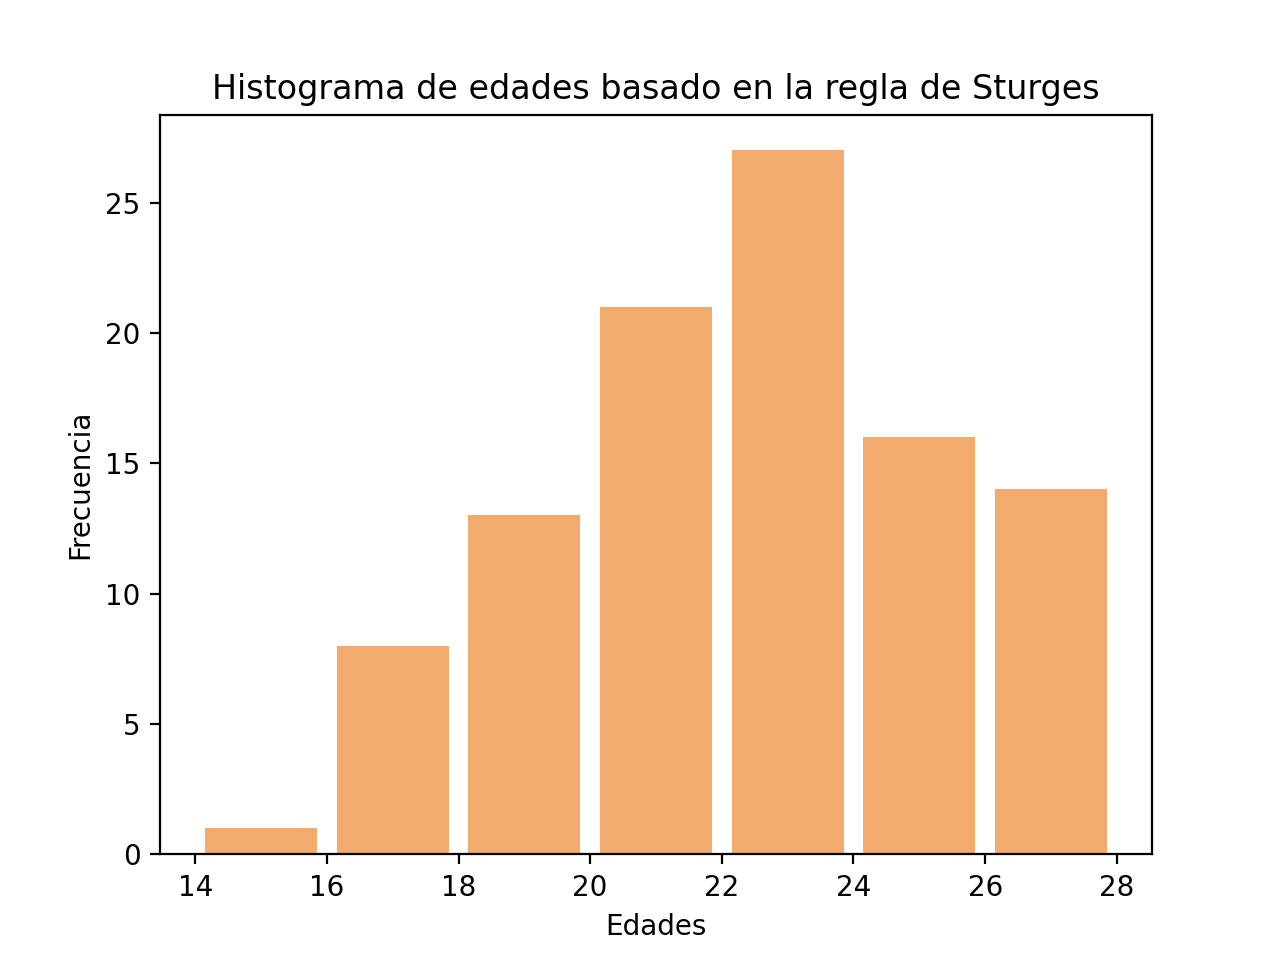

In [99]:
# Crear un histograma basado en la tabla de frecuencia
plt.hist(df['Edad'], bins=k, color='#F2AB6D', rwidth=0.85)
plt.title('Histograma de edades basado en la regla de Sturges')
plt.xlabel('Edades')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()







## Tabla de frecuencia con menor número de clases

In [100]:
k = 5 # Número de clases
# Crear un DataFrame con las edades redondeadas
df = pd.DataFrame({'Edad': edades})

# Crear un histograma con pandas y obtener la tabla de frecuencia
tabla_frecuencia = pd.cut(df['Edad'], bins=k, include_lowest=True).value_counts().reset_index()
tabla_frecuencia.columns = ['Clase', 'Frec']

# Ordenar la tabla de frecuencia por el intervalo
tabla_frecuencia = tabla_frecuencia.sort_values(by='Clase')

# Generar columnas siguientes
tabla_frecuencia['Frec Rel'] = tabla_frecuencia['Frec'] / n
tabla_frecuencia['Frec Porc'] = tabla_frecuencia['Frec'] / n * 100
tabla_frecuencia['Frec Ac'] = tabla_frecuencia['Frec'].cumsum()
tabla_frecuencia['Frec Rel Ac'] = tabla_frecuencia['Frec Rel'].cumsum()
tabla_frecuencia['Frec Porc Ac'] = tabla_frecuencia['Frec Porc'].cumsum()


# Mostrar la tabla de frecuencia
print(tabla_frecuencia)


                        Clase  Frec  Frec Rel  Frec Porc  Frec Ac  \
4  (13.985000000000001, 16.8]     4      0.04        4.0        4   
2                (16.8, 19.6]    18      0.18       18.0       22   
0                (19.6, 22.4]    38      0.38       38.0       60   
1                (22.4, 25.2]    26      0.26       26.0       86   
3                (25.2, 28.0]    14      0.14       14.0      100   

   Frec Rel Ac  Frec Porc Ac  
4         0.04           4.0  
2         0.22          22.0  
0         0.60          60.0  
1         0.86          86.0  
3         1.00         100.0  


### Visualizar tabla de frecuencia de edades

Se visualiza el histograma de las edades de los datos

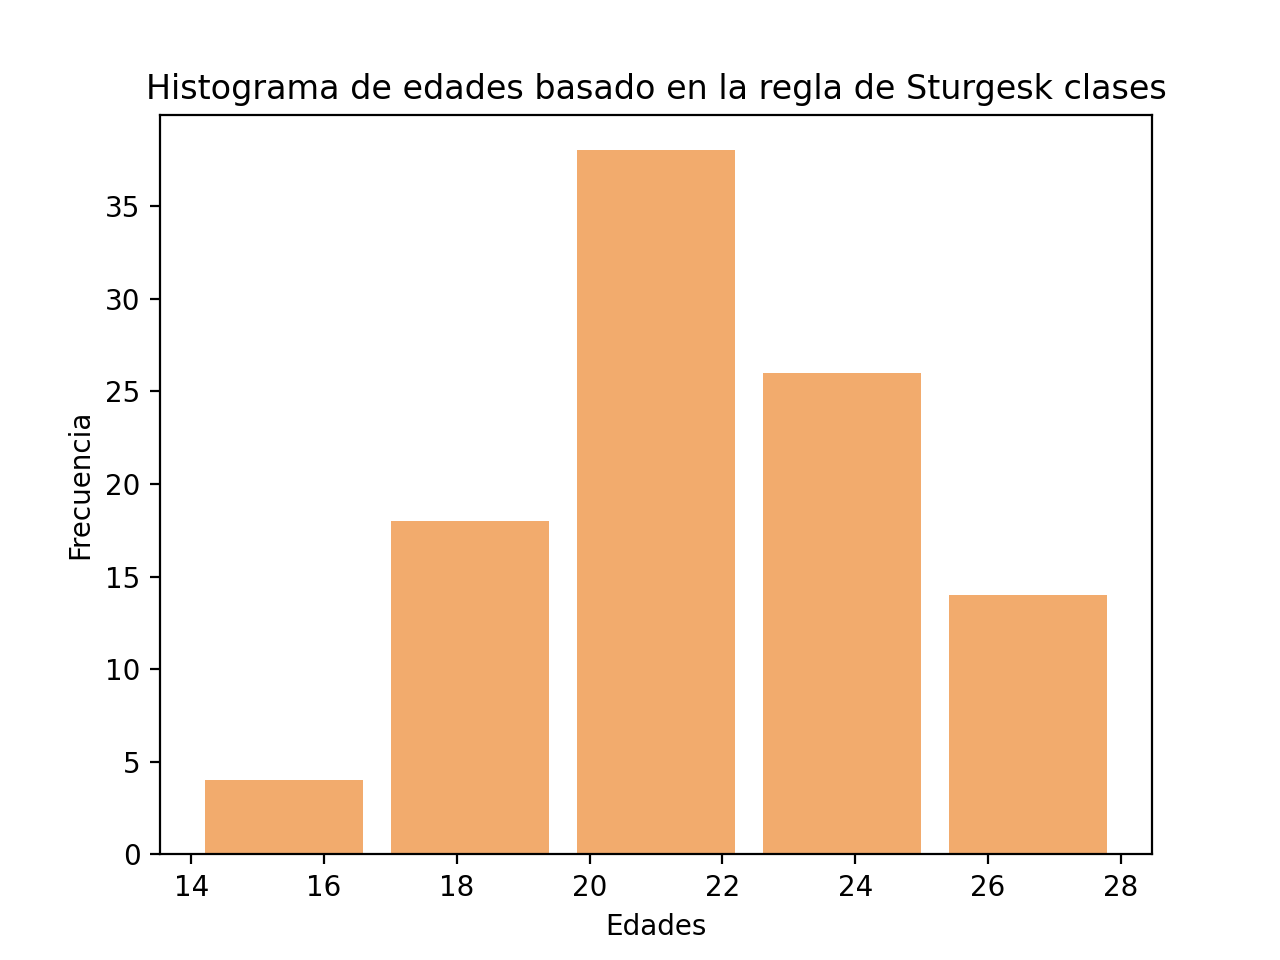

In [101]:

# Crear un histograma basado en la tabla de frecuencia
plt.hist(df['Edad'], bins=k, color='#F2AB6D', rwidth=0.85)
plt.title('Histograma de edades basado en la regla de Sturgesk clases')
plt.xlabel('Edades')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()


plot.show() #dibujar el histograma

### Tabla de frecuencia de género

Una alternativa de código

In [102]:
tabla_frecuencia = datos['Genero'].value_counts().reset_index()
tabla_frecuencia.columns = ['Género', 'Frecuencia']

# Mostrar la tabla de frecuencia
print(tabla_frecuencia)

      Género  Frecuencia
0   Femenino          55
1  Masculino          45


### Visualizar tabla de frecuencia


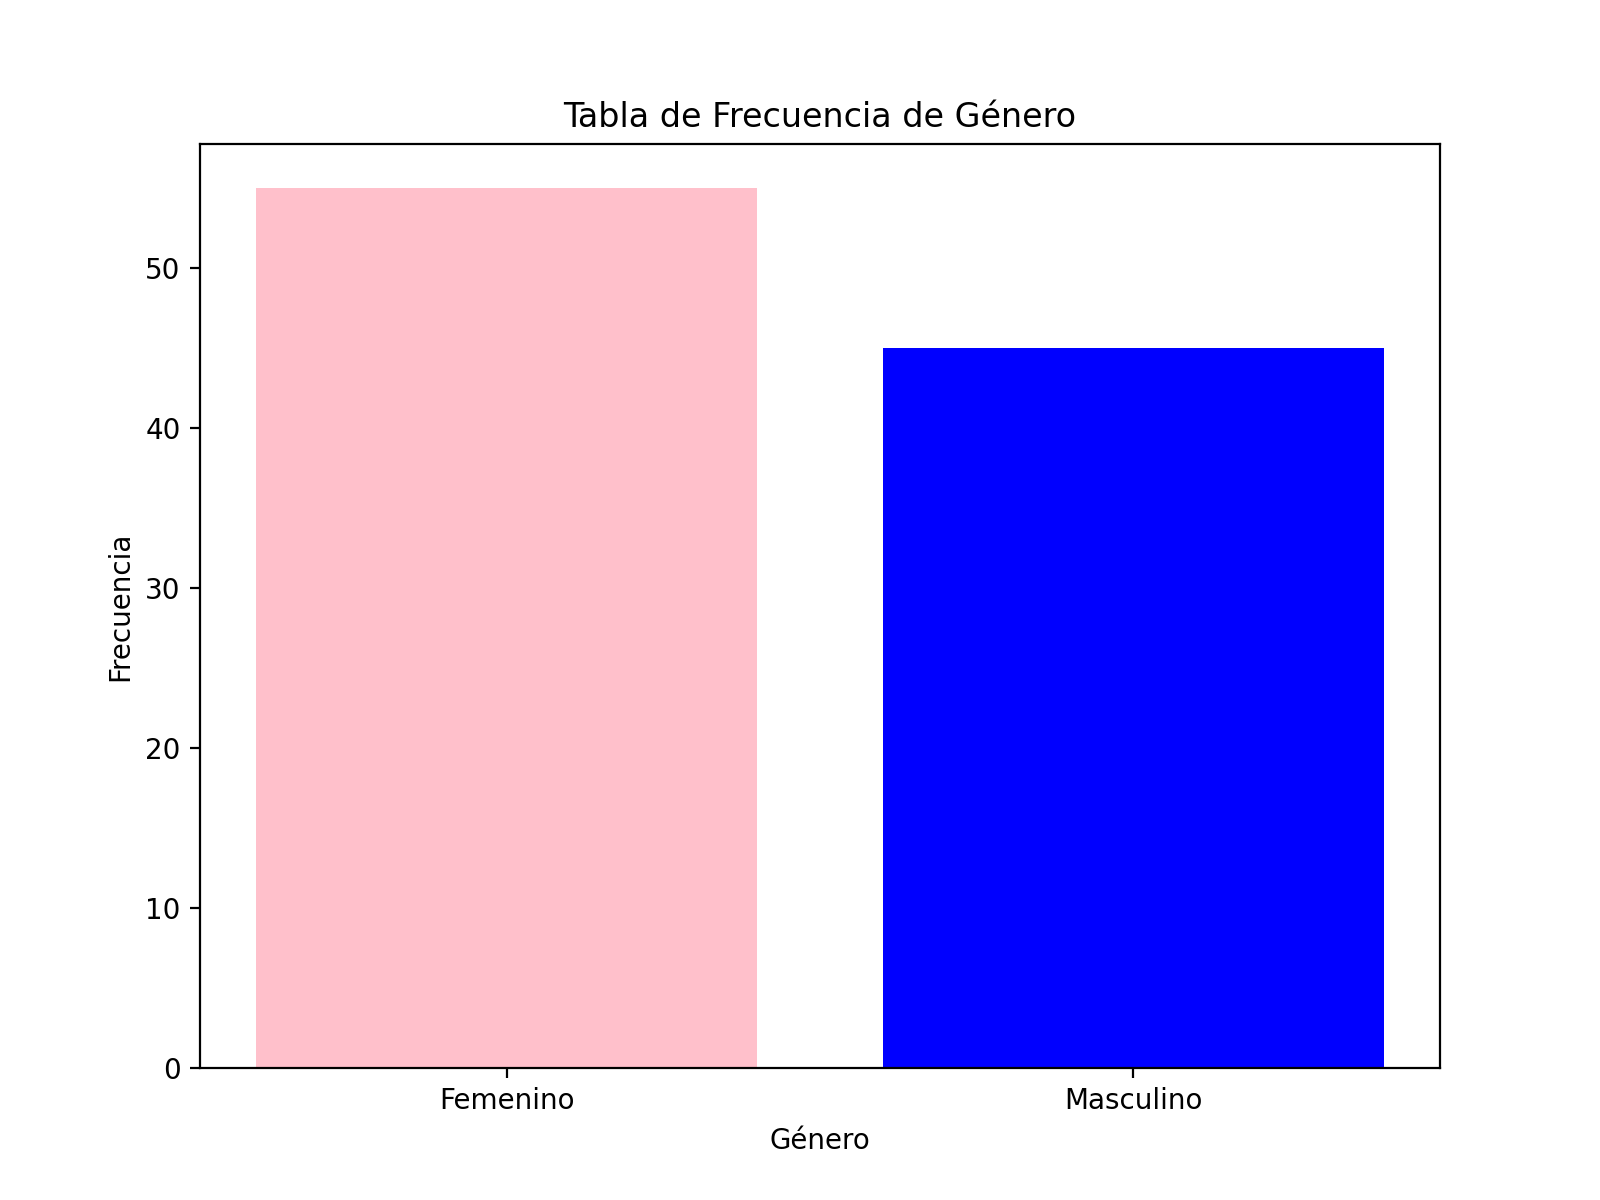

In [103]:
plt.figure(figsize=(8, 6))
plt.bar(tabla_frecuencia['Género'], tabla_frecuencia['Frecuencia'], color=['pink', 'blue'])
plt.title('Tabla de Frecuencia de Género')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.show()







### Tabla de frecuencia de género

Determinar cuantas personas hay de cada género. Código más elaborado



In [104]:
 (datos
  .groupby("Genero")
  .agg(frequency=("Genero", "count")))

,frequency
Genero,
Femenino,55
Masculino,45


### Visualizar tabla de frecuncia de género


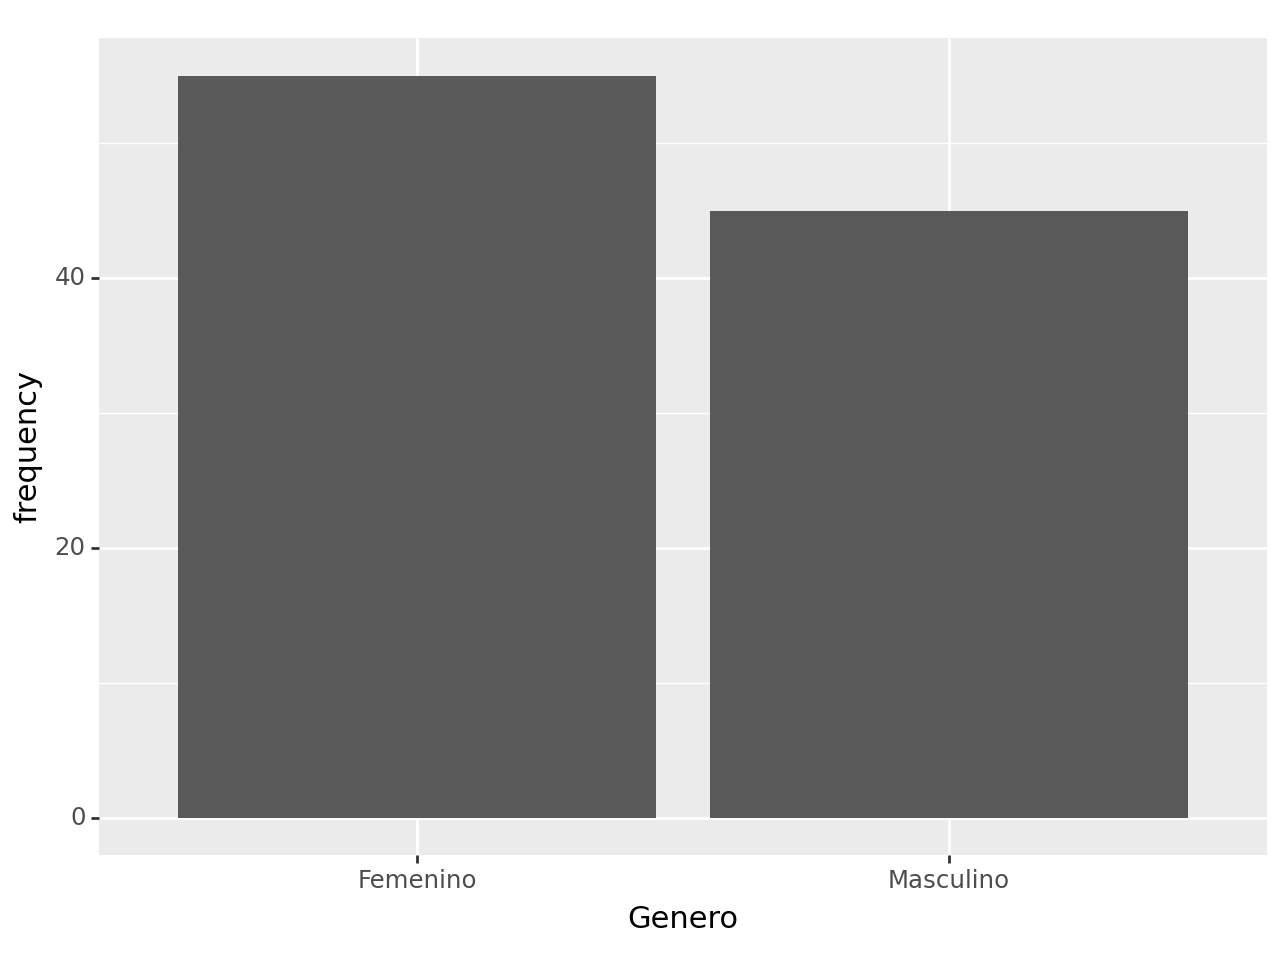

<Figure Size: (640 x 480)>

In [105]:
from plotnine import *

freq_by_genero = (datos
  .groupby("Genero")
  .agg(frequency=("Genero", "count"))
  .reset_index())

(ggplot(freq_by_genero, aes(x = "Genero", y = "frequency")) +
  geom_bar(stat = 'identity'))

## Interpretación

Al menos 100 palabras a título personal

Las tablas de frecuencia representan la cantidad de ocasiones que hay de un valor con respecto al total.

Para este ejercicio hay alrededor de 55 personas del género femenino y 45 del género masculino

Con respecto a la variable edad existen alrededor de 27 personas de 21 a 23 años.